### AccelerateAI - Python - Data Visualization

Data visualization is a visual (or graphic) representation of data to find useful insights (i.e. trends and patterns) in the data and making the process of data analysis easier and simpler.

In this Notebook we will cover the following: 
1. Drawing Basic Plots
2. Customizing Plots 
3. 3D Visualizations 
4. Interactive Plots 
5. Charts with Images and Maps

There are many plotting libraries in Python. Here we will use the four most popular Python plotting libraries
   - Matplotlib 
   - Seaborn
   - Plotly
    
###### Matplotlib 
This is the oldest Python plotting library, and it's still the most popular. It was created in 2003 as part of the SciPy Stack, an open source scientific computing library similar to Matlab.Matplotlib gives very precise control over each plot.


###### Seaborn
Seaborn is an abstraction layer on top of Matplotlib; it gives you a really neat interface to make a wide range of useful plot types very easily.Seaborn's code is simpler than the raw Matplotlib. 


###### Plotly
Plotly is a plotting ecosystem that includes a Python plotting library.Plotly plots are designed to be embedded in web apps.It creates charts that are dynamic. 


#### 1. Basic Plots 

In [1]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import random

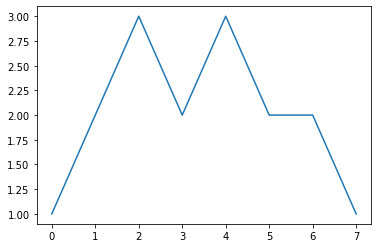

In [2]:
plt.plot([1,2,3,2,3,2,2,1])               # Y values provides. X values are taken by default

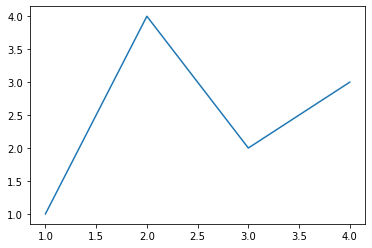

In [3]:
x = [1,2,3,4]
y = [1,4,2,3]
plt.plot(x,y)

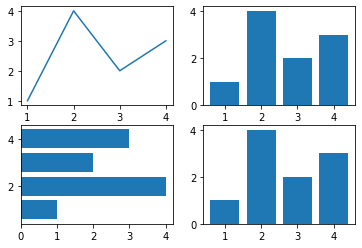

In [4]:
# create new figure
plt.figure()

# divide subplots into 2 x 2 grid and select #1
plt.subplot(221)
plt.plot(x, y)

# vertical bar chart
plt.subplot(222)
plt.bar(x, y)

# horizontal bar-charts
plt.subplot(223)
plt.barh(x, y)

# create stacked bar charts
plt.subplot(224)
plt.bar(x, y)

plt.show()

In [5]:
#Statistical Plots 
import pandas as pd 

weather_df = pd.read_csv("city_temp.csv")
weather_df.drop("month", inplace=True, axis=1)
weather_df.head()

New Delhi  Mumbai  Bengaluru  Kolkata
0       57.5    76.0       72.5     66.5
1       63.5    78.0       75.5     73.0
2       73.5    81.5       79.5     81.5
3       84.0    84.5       82.0     86.0
4       91.0    86.5       81.0     87.0

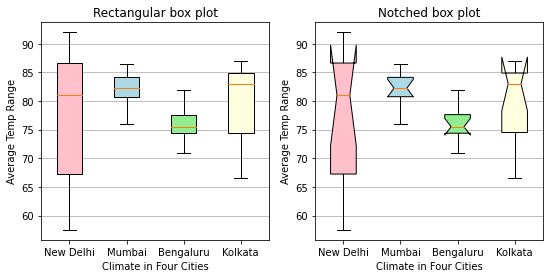

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

labels = ["New Delhi", "Mumbai", "Bengaluru", "Kolkata"]
# rectangular box plot
bplot1 = ax1.boxplot(weather_df,
                     vert=True,          # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)      # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

# notch shape box plot
bplot2 = ax2.boxplot(weather_df,
                     notch=True,         # notch shape
                     vert=True,          # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)      # will be used to label x-ticks
ax2.set_title('Notched box plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen', 'lightyellow']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Climate in Four Cities')
    ax.set_ylabel('Average Temp Range')

plt.show()

Text(0.5, 1.0, 'Climate in Four Cities')

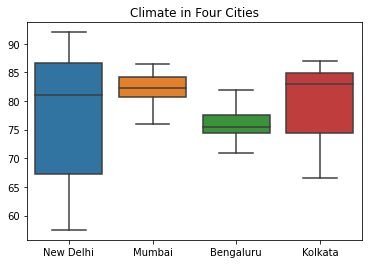

In [7]:
#Seaborn requires much less coding as compared to matplotlib. 
sns.boxplot(data = weather_df).set_title("Climate in Four Cities")                    

In [8]:
#Scatter plot 
season_df = pd.read_csv("seasons.csv")
season_df.head()

month       City  Season  Avg temp  Rainfall
0   Jan  New Delhi  Winter      57.5       0.6
1   Feb  New Delhi  Spring      63.5       0.8
2   Mar  New Delhi  Spring      73.5       0.5
3   Apr  New Delhi  Summer      84.0       0.6
4   May  New Delhi  Summer      91.0       1.0

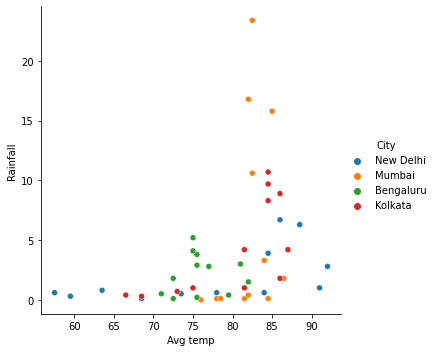

In [9]:
sns.relplot( data=season_df, x="Avg temp", y="Rainfall", hue="City");

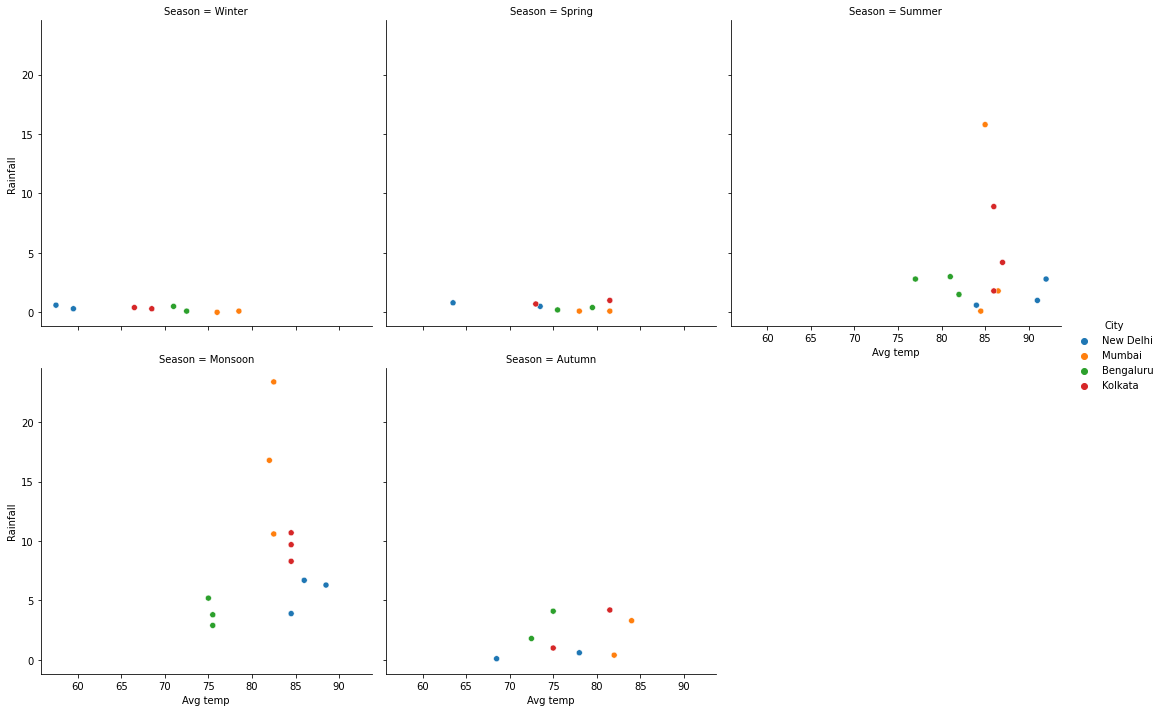

In [10]:
sns.relplot(data=season_df, x="Avg temp", y="Rainfall", hue = "City", col="Season", col_wrap=3);

Text(0.5, 1.0, 'Swarmplot: Rainfall in 5 seasons')

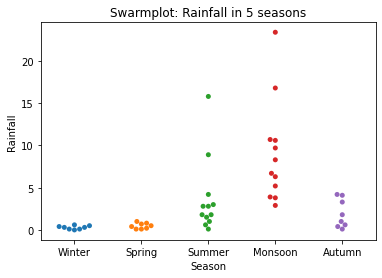

In [11]:
sns.swarmplot(x='Season', y='Rainfall', data=season_df).set_title("Swarmplot: Rainfall in 5 seasons")

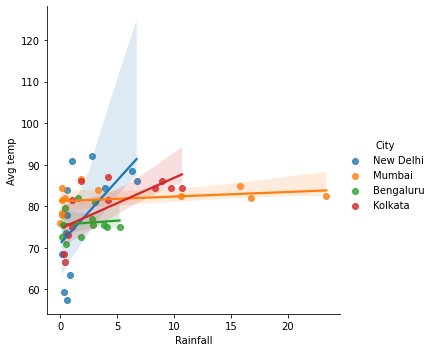

In [12]:
sns.lmplot(x='Rainfall', y='Avg temp', data=season_df, hue='City')

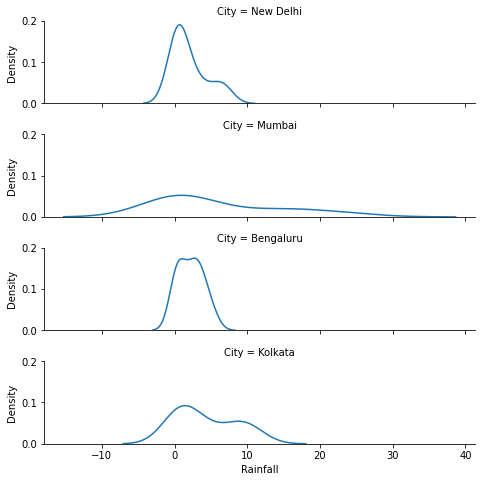

In [13]:
#Density plot
g = sns.FacetGrid(season_df, row="City",           # Varible on which to split the data
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "Rainfall")                     #Type of plot, Variable to be plotted

<AxesSubplot:xlabel='Avg temp', ylabel='Rainfall'>

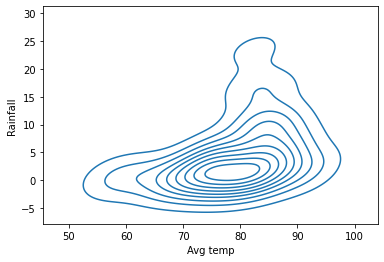

In [14]:
#Contour plot
sns.kdeplot(data=season_df, x="Avg temp", y= "Rainfall")

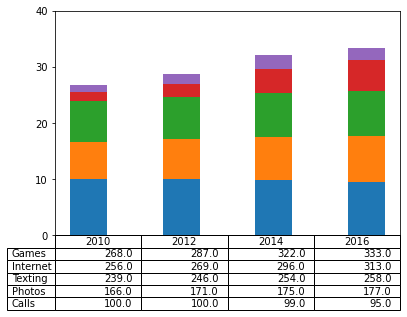

In [15]:
# Combining data with plots
data = [[ 100, 100,  99, 95],
        [ 66, 71,  76,  82],
        [ 73,  75, 79, 81],
        [ 17,  23, 42, 55],
        [ 12, 18, 26, 20]]
 
columns = ('2010', '2012', '2014', '2016')
rows = ("Calls", "Photos", "Texting", "Internet", "Games")[::-1]
 
index = np.arange(len(columns)) + 0.5
bar_width = 0.4
 
# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))
 
# Plot bars and create text labels for the table
cell_text = []
for row in range(len(data)):
    plt.bar(index, data[row], bar_width, bottom=y_offset)
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x) for x in y_offset])
    
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()
 
# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='bottom')
 
# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.1, bottom=0.1)

values = np.arange(0, 50, 10)
plt.yticks(values * 10, ['%d' % val for val in values])
plt.xticks([])
plt.show()

#### 2. Customizing Plots

There are three ways to customize Matplotlib:
- Setting rcParams at runtime.
- Using style sheets.
- Changing your matplotlibrc file

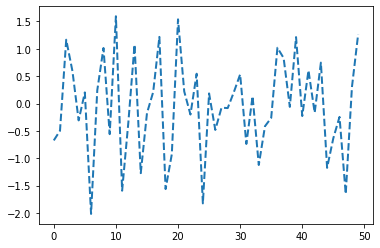

In [16]:
#rcParams() in matplotlib 
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
data = np.random.randn(50)
plt.plot(data)

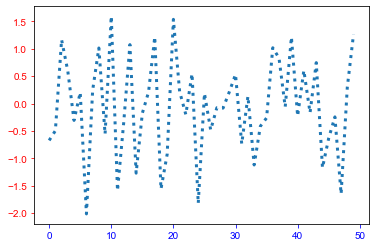

In [17]:
mpl.rcParams['lines.linestyle'] = ':'
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['font.sans-serif'] = 'Arial'   
mpl.rcParams['xtick.color'] = 'blue'
mpl.rcParams['ytick.color'] = 'red'

plt.plot(data)

###### To customize the elements like title, x and y labels, figure size etc there are functions available.

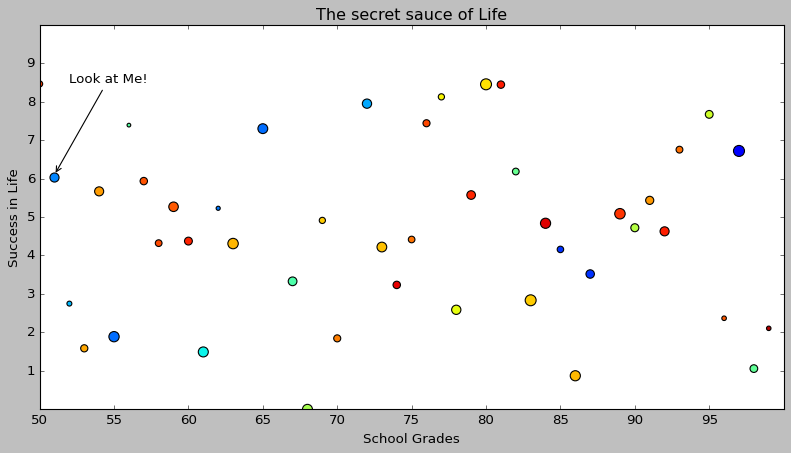

In [18]:
# cook some data
np.random.seed(2021)
x = range(50, 100)                       #School grades
y = 4 + np.random.normal(0, 3, len(x))   #Successful-ness
# size and color:
titles = np.random.uniform(5, 100, len(x))
industry = np.random.uniform(10, 100, len(x))

#set style 
plt.style.use('classic')

# create plot
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x, y, s=titles, c=industry, vmin=0, vmax=100)

#customization - set x and y labels, title, the axes limits , the x and y ticks
ax.set_xlabel('School Grades')
ax.set_ylabel('Success in Life')
ax.set_title("The secret sauce of Life")

ax.set(xlim=(50, 100), xticks=np.arange(50, 100, 5),
       ylim=(0, 10), yticks=np.arange(1, 10))

#annotate an important data point
ax.annotate("Look at Me!", (51,6.1), 
            xytext=(52,8.5),
            arrowprops=dict(arrowstyle='->'))

#Showtime 
plt.show()

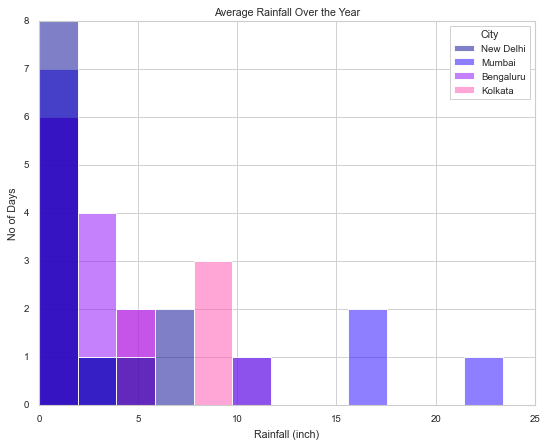

In [19]:
#Seaborn as expected allows for less coding to acheive customization as well.

sns.set_style("whitegrid")
sns.set_palette("gnuplot2")
sns.set_context("paper")

#create the plot
s = sns.histplot(data=season_df, x="Rainfall",  hue="City")

# Add a title "Average MPG Over Time"
s.set_title("Average Rainfall Over the Year");
# Add x-axis and y-axis labels
s.set(xlabel="Rainfall (inch)", ylabel="No of Days");

Text(0.5, 1.0, 'Climate in Four Cities')

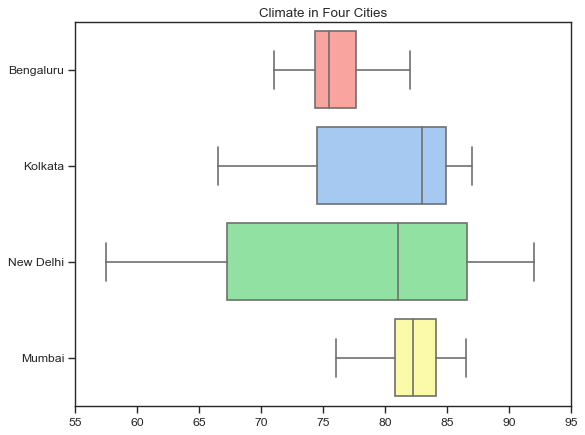

In [20]:
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(data = weather_df,
            palette=["r", "b", "g", "y"],  
            saturation = 0.9,    
            orient="h",                                                         #orientation
            order=["Bengaluru", "Kolkata", "New Delhi", "Mumbai"]              #Control the order 
           ).set_title("Climate in Four Cities")                    

#### 3. 3D Visualization 

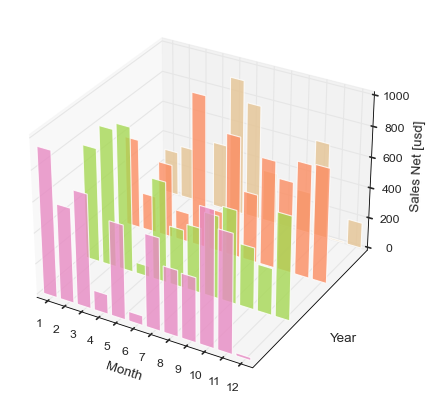

In [21]:
# An Axes3D object is created just like any other axes using the projection=‘3d’ keyword.
# xs, ys	x, y coordinates of vertices
# zs	z value(s), either one for all points or one for each point.

random.seed(4)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#cooking some sales data
for z in [2011, 2012, 2013, 2014]:
    xs = range(1,13)                      #Month
    ys = 1000 * np.random.rand(12)        #Sales

    color = plt.cm.Set2(random.choice(range(plt.cm.Set2.N)))
    ax.bar(xs, ys, zs=z, zdir='y', color=color, alpha=0.8)

ax.xaxis.set_major_locator(mpl.ticker.FixedLocator(xs))
ax.yaxis.set_major_locator(mpl.ticker.FixedLocator(ys))
ax.set_xlabel('Month')
ax.set_ylabel('Year')
ax.set_zlabel('Sales Net [usd]')

plt.show()

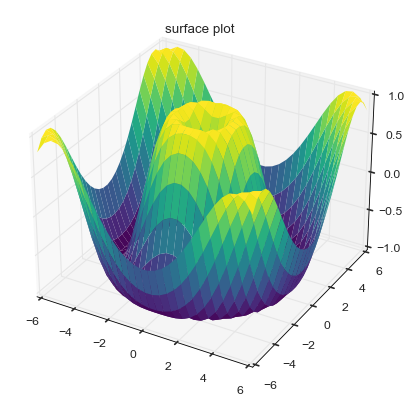

In [22]:
#3d Surface Plot 

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot the 3d surface and fill with color
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.set_title('surface plot');

#### 4. Interactive Plots 

###### Plotly's Python graphing library makes interactive, publication-quality graphs.
- Plotly is an open source graphing library for creating interactive charts and maps for Python, R, Julia, Javascript and others.
- The primary classes defined in the plotly.graph_objects module are Figure an FigureWidgets
- Plotly Express (recommended entry-point into the plotly library) are all built on top of graph objects
    - Plotly Express provides more than 30 functions for creating different types of figures. 
    - The API for these functions was carefully designed to be as consistent and easy to learn as possible

In [23]:
#import plotly.express as px

In [24]:
#Plotting stock Data
df = px.data.stocks()
fig = px.line(df, x='date', y=["MSFT","GOOG",'FB',"AMZN"])
fig.show()

In [25]:
melb_df= pd.read_csv("melb_data.csv")
melb_df.sample(5).T

7905                  4092  \
Suburb                       Glenroy          Moonee Ponds   
Address             14 Hartington St          25 Argyle St   
Rooms                              3                     2   
Type                               h                     h   
Price                         730000                750000   
Method                             S                    VB   
SellerG                    Stockdale                Nelson   
Date                      20-05-2017            15-10-2016   
Distance                          13                   6.9   
Postcode                        3046                  3039   
Bedroom2                           3                     2   
Bathroom                           2                     1   
Car                                4                     1   
Landsize                         563                     0   
BuildingArea                     NaN                   NaN   
YearBuilt                       1950                   NaN   
CouncilArea                 Moreland         Moonee Valley   
Lattitude                    -37.702              -37.7686   
Longtitude                   144.917               144.907   
Regionname     Northern Metropolitan  Western Metropolitan   
Propertycount                   8870                  6232   

                                1514                  1481  \
Suburb                       Burwood               Bulleen   
Address             1/109 Station St     135 Manningham Rd   
Rooms                              3                     4   
Type                               u                     h   
Price                         686000               1085000   
Method                            PI                    PI   
SellerG                          Ray                 Barry   
Date                      04-03-2017            10-12-2016   
Distance                        11.7                  11.8   
Postcode                        3125                  3105   
Bedroom2                           3                     4   
Bathroom                           1                     2   
Car                                2                     1   
Landsize                         273                  1124   
BuildingArea                     NaN                   225   
YearBuilt                       1980                  1960   
CouncilArea               Whitehorse            Manningham   
Lattitude                   -37.8473              -37.7679   
Longtitude                    145.12               145.096   
Regionname     Southern Metropolitan  Eastern Metropolitan   
Propertycount                   5678                  4480   

                               6013  
Suburb               Sunshine North  
Address                7 Charles St  
Rooms                             3  
Type                              h  
Price                        607000  
Method                            S  
SellerG                     Douglas  
Date                     07-05-2016  
Distance                       13.3  
Postcode                       3020  
Bedroom2                          3  
Bathroom                          1  
Car                               2  
Landsize                        575  
BuildingArea                    NaN  
YearBuilt                       NaN  
CouncilArea                Brimbank  
Lattitude                  -37.7748  
Longtitude                  144.833  
Regionname     Western Metropolitan  
Propertycount                  4217

In [26]:
melb_df.Type.value_counts()               # h - house(villa,house), u - unit(in an apartment), t - others

h    9447
u    3017
t    1114
Name: Type, dtype: int64

In [27]:
# Plot a pie chart showing the distribution of no of rooms 
fig = px.pie(
    melb_df,
    names = 'Rooms',
    title = 'Distibution by # Rooms',
    color_discrete_sequence = px.colors.sequential.Magma
)

fig.show()

In [28]:
#3D Scatter plot - Price variation by distance and area 
fig = px.scatter_3d(melb_df, 
                    x='Landsize', 
                    y='Distance', 
                    z='Price',
                    color='Type', 
                    opacity=0.7
                   )
fig.show()

In [29]:
#Map view 
fig = px.scatter_geo(melb_df, 
                     lat ="Lattitude", 
                     lon ="Longtitude",
                     color = "Type" 
                     )
fig.show()